### Student Details

Student Name: Aryank Gupta

Student ID: 24101613


# Task 2: scikit learn

#Importing Dependencies

In [4]:
# import dependencies
import numpy as np
from sklearn.linear_model import Perceptron as Perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [7]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)
print(df.columns)

df.columns = df.columns.str.strip()

df_filtered = df[(df['class'] == 'Iris-setosa') | (df['class'] == 'Iris-virginica')]

X = df_filtered[['petal_length', 'petal_width']].values
y = df_filtered['class'].values


Index(['sepal_length', ' sepa_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

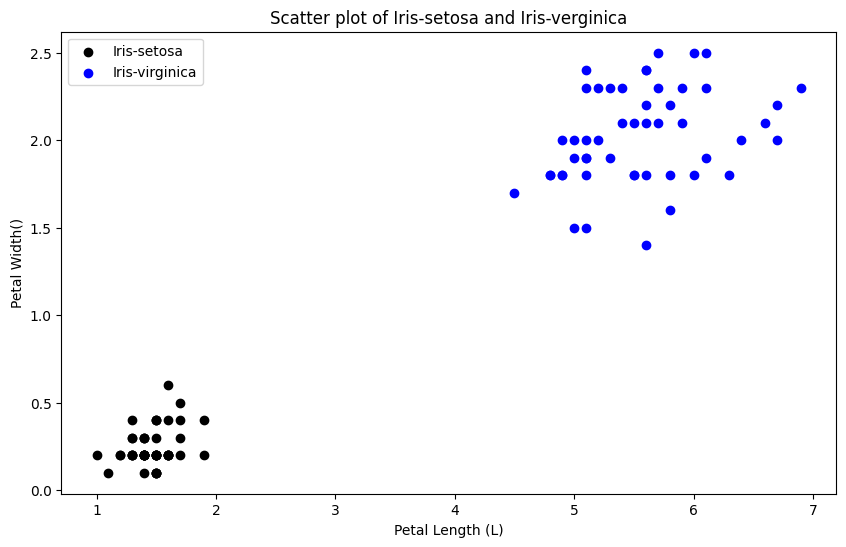

In [12]:
colors = {'Iris-setosa': 'black', 'Iris-virginica': 'blue'}
plt.figure(figsize=(10,6))
plt.scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1], color='Black', label='Iris-setosa')
plt.scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1], color='Blue', label='Iris-virginica')
plt.xlabel('Petal Length (L)')
plt.ylabel('Petal Width()')
plt.legend()
plt.title('Scatter plot of Iris-setosa and Iris-verginica')
plt.show()

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [9]:
from sklearn.linear_model import Perceptron as Perceptron

y_encoded = np.where(y == 'Iris-setosa', 1, -1)

# Initializing and training the perceptron
perceptron = Perceptron(max_iter=1000, verbose=1, random_state=1, eta0=0.01)
perceptron.fit(X, y_encoded)

-- Epoch 1
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 100, Avg. loss: 0.003347
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 400, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 500, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 600, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 2, Bias: 0.050000, T: 700, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Perceptron(eta0=0.01, random_state=1, verbose=1)

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

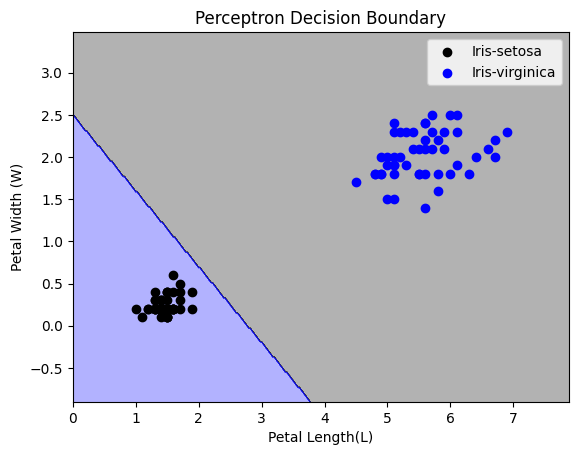

In [11]:
import random

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = {'Iris-setosa': 'Black', 'Iris-virginica': 'Blue'}
    cmap = ListedColormap([colors['Iris-setosa'], colors['Iris-virginica']])


    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


# Ploting the decision boundary
plot_decision_boundary(X, y_encoded, perceptron)
plt.scatter(X[y_encoded == 1, 0], X[y_encoded == 1, 1], color='Black', label='Iris-setosa')
plt.scatter(X[y_encoded == -1, 0], X[y_encoded == -1, 1], color='Blue', label='Iris-virginica')
plt.xlabel('Petal Length(L)')
plt.ylabel('Petal Width (W)')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.show()